In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# helpers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# models
from sklearn.tree import DecisionTreeClassifier

#### Dataset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Attributes:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [12]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
# Encode categorical variables using one hot encoding
categ_variables = ['Sex',
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope']

# Built in OHE func in pandas : help(pd.get_dummies)
df = pd.get_dummies(data=df, prefix=categ_variables, columns=categ_variables, dtype=int)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [14]:
features = [col for col in df.columns if col not in 'HeartDisease']
len(features)

20

In [15]:
# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df['HeartDisease'], train_size=0.8)
len(xtrain), len(xtest)

(734, 184)

### Model

In [16]:
# Finding good values for hyperparameters - 
#   min_samples_split: min. number of samples required to split
#   max_depth: max. allowed depth for the tree

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

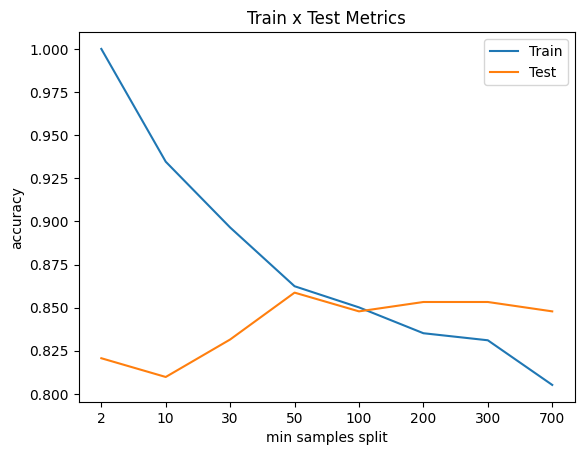

In [17]:
accuracy_train, accuracy_test = [], []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split).fit(xtrain, ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    accuracy_train.append(accuracy_score(ytrain, pred_train))
    accuracy_test.append(accuracy_score(ytest, pred_test))

plt.title('Train x Test Metrics')
plt.xlabel('min samples split')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.ylabel('accuracy')

plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train', 'Test'])

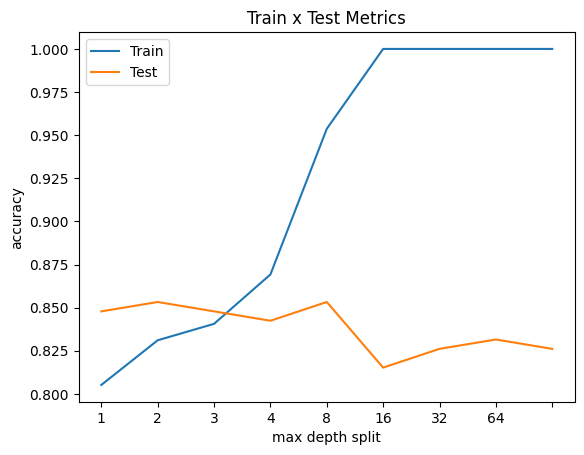

In [18]:
accuracy_train, accuracy_test = [], []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth).fit(xtrain, ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    accuracy_train.append(accuracy_score(ytrain, pred_train))
    accuracy_test.append(accuracy_score(ytest, pred_test))

plt.title('Train x Test Metrics')
plt.xlabel('max depth split')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.ylabel('accuracy')

plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train', 'Test'])

In [24]:
decision_tree = DecisionTreeClassifier(min_samples_split=120, max_depth=3).fit(xtrain, ytrain)
pred_train = decision_tree.predict(xtrain)
pred_test = decision_tree.predict(xtest)

In [27]:
print(f"Train Accuracy: {accuracy_score(ytrain, pred_train)*100:.4f}%")
print(f"Test Accuracy: {accuracy_score(ytest, pred_test)*100:.4f}%")

Train Accuracy: 84.0599%
Test Accuracy: 84.7826%
